# K Means Clustering and PCA

In [ ]:
import pandas as pd
import numpy as np



### First, we will be starting by fitting k-means-clustering algorithm to the Madelon data using different k-values and asses the sum squared distance from cluster centers.

In [ ]:
madelon_df = pd.read_csv('madelon.csv')

In [ ]:
madelon_df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0,485,477,537,479,452,471,491,476,475,...,477,481,477,485,511,485,481,479,475,496
1,1,483,458,460,487,587,475,526,479,485,...,463,478,487,338,513,486,483,492,510,517
2,2,487,542,499,468,448,471,442,478,480,...,487,481,492,650,506,501,480,489,499,498
3,3,480,491,510,485,495,472,417,474,502,...,491,480,474,572,454,469,475,482,494,461
4,4,484,502,528,489,466,481,402,478,487,...,488,479,452,435,486,508,481,504,495,511


In [ ]:
madelon_df.info()
madelon_df = madelon_df.drop("Unnamed: 0", axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 501 entries, Unnamed: 0 to V500
dtypes: int64(501)
memory usage: 9.9 MB


In [ ]:
madelon_df.isnull().sum()

V1      0
V2      0
V3      0
V4      0
V5      0
       ..
V496    0
V497    0
V498    0
V499    0
V500    0
Length: 500, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
### Standardizing the data
scaler = StandardScaler()
scaled_madelon = scaler.fit_transform(madelon_df)
scaled_madelon

array([[ 0.51613623, -0.21597363,  0.71307718, ..., -0.30556792,
        -0.90311629,  0.2087788 ],
       [ 0.19926393, -0.84235166, -1.27190663, ...,  0.64995023,
         0.04222888,  1.01890759],
       [ 0.83300853,  1.92689861, -0.26652522, ...,  0.42944604,
        -0.2548796 ,  0.28593392],
       ...,
       [ 0.51613623,  0.0477645 ,  0.5326241 , ..., -0.15856513,
        -0.66002753,  1.01890759],
       [-0.75135298, -0.47971175,  0.48106608, ...,  0.50294744,
         2.82424466,  0.05446855],
       [ 0.04082778, -1.00718799,  0.14593894, ...,  0.79695303,
         0.74448529,  1.36610564]])

#### Before running the kmeans clustering algorithm, we scaled our data using standard scaling method. Since k means clustering is a distance based algorithm, scaling the data before running the algorithm is an important prepocessing step. Data sets usually contain numerical features that have been measured in different units, such as height (in cm) and weight (in kg). All distance based machine learning algorithms would consider weight more important than height only because the values for weight are larger and have higher variability from person to person. Since we want our algorithm to consider all features evenly, we need to transform the whole dataset to the same scale

In [ ]:
### Instantiating the k-means class with the following arhuments:
kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [ ]:
### kmeans clustering with k=4
kmeans = KMeans(n_clusters=4, **kmeans_args)
kmeans.fit(scaled_madelon)

# The lowest SSE value
print(f"Lowest SSE: {kmeans.inertia_}")




Lowest SSE: 1277777.9761392407


In [ ]:
### kmeans clustering with k=8
kmeans = KMeans(n_clusters=8, **kmeans_args)
kmeans.fit(scaled_madelon)

# The lowest SSE value
print(f"Lowest SSE: {kmeans.inertia_}")




Lowest SSE: 1268601.3313087127


In [ ]:
### kmeans clustering with k=16
kmeans = KMeans(n_clusters=16, **kmeans_args)
kmeans.fit(scaled_madelon)

# The lowest SSE value
print(f"Lowest SSE: {kmeans.inertia_}")



Lowest SSE: 1260916.6439111677


In [ ]:
### kmeans clustering with k=32
kmeans = KMeans(n_clusters=32, **kmeans_args)
kmeans.fit(scaled_madelon)

# The lowest SSE value
print(f"Lowest SSE: {kmeans.inertia_}")



Lowest SSE: 1251275.2613517698


In [ ]:
### kmeans clustering with k=64
kmeans = KMeans(n_clusters=64, **kmeans_args)
kmeans.fit(scaled_madelon)

# The lowest SSE value
print(f"Lowest SSE: {kmeans.inertia_}")



Lowest SSE: 1232788.687264334


#### The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.
#### As we can see from the results of different kmeans clustering algorithms with different k values, SSE of the model decreases as the k value increases. This will be the case for most datasets, as assigning bigger k-values mean the individial datapoints have higher chance of being closer to their assigned centroid by that decreasing the SSE value. If the k-value = n we will have SSE = 0, since each individual observation will have 0 distance from its assigned cluster.
#### Therefore, choosing an optimal k-value is very important for k-means clustering. When the number of clusters is too low the model will group dissimilar datapoints together which will lead to high-sse values/ low quality clusters, if the number of clusters is too high, the model will create many small clusters that would not help us to group our dataset in a meaningfull way.
### Most common methods to help us choose the k-value are elbow rule, and silhouette score. They help us to choose the most optimal k-value balance that would minimize the SSE without overfitting.

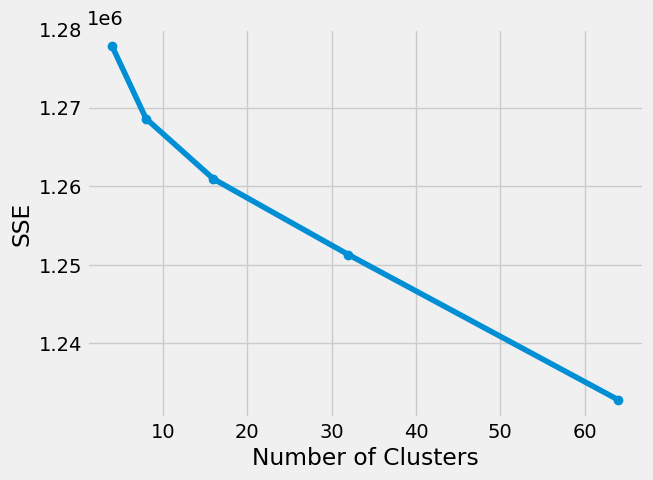

In [ ]:
kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
k_list =[4,8,16,32,64]
sse = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(scaled_madelon)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(k_list, sse, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### As we can clearly see from the plot above, the SSE value decreases as the number of clusters increase. We will also look at the silhouette coefficient to choose an optimal k.

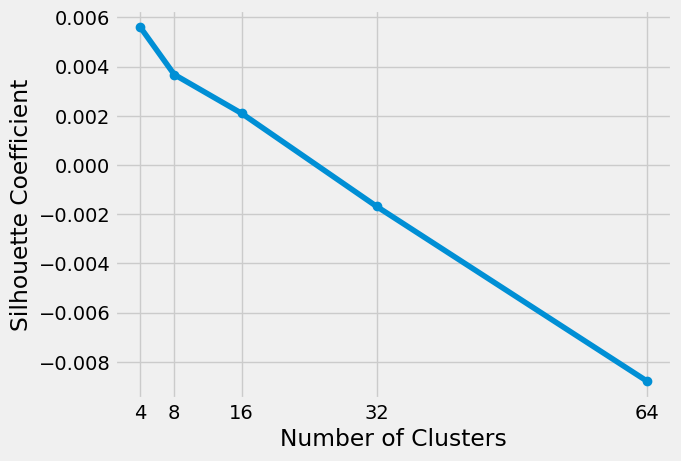

In [ ]:
kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

k_list =[4,8,16,32,64]
silhouette_coefficients = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(scaled_madelon)
    score = silhouette_score(scaled_madelon, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(k_list, silhouette_coefficients, marker = "o")
plt.xticks(k_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


#### We will choose k=8 to be the most optimal k value, since the SSE  does not change much between each k-value, but the Silhouette Coefficient is the highest for k = 8. We will rely on the silhouette score to choose optimal k-value also since it is hard to see the elbow point on the SSE plot.

### Now we will be re-running the k-means-clustering algorithm with k=8 using different centroid initialization methods.

In [ ]:
kmeans1_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 22,
}

### 8 means clustering with Random centroid initialization.
kmeans1 = KMeans(n_clusters=8, **kmeans1_args)
kmeans1.fit(scaled_madelon)

### Get SSE
sse1 = kmeans1.inertia_
print("SSE of 8 means clustering with Random centroid initialization.")
print(sse1)

### Get the centorids
centroid1 = kmeans1.cluster_centers_
print("Centroids of the model with Random centroid initialization.")
print(centroid1)

sc1= silhouette_score(scaled_madelon, kmeans1.labels_)
print("Silhouette score of the model with Random centroid initialization.")
print(sc1)

n_iter1 = kmeans1.n_iter_
print("Number of Iterations algorithm ran before converging for the model with Random centroid initialization.")
print(n_iter1)


SSE of 8 means clustering with Random centroid initialization.
1268615.7052544232
Centroids of the model with Random centroid initialization.
[[ 0.05017991 -0.02755655 -0.09896166 ... -0.06439146  0.04766837
  -0.07318567]
 [ 0.02707135  0.14488961  0.07114894 ...  0.09604899 -0.02796441
   0.10979385]
 [-0.02454922  0.06761839 -0.03393913 ...  0.03871371 -0.00596716
   0.07311198]
 ...
 [-0.00477551  0.06517747 -0.01102999 ...  0.00915764  0.08959632
  -0.08404436]
 [ 0.03228465 -0.05711666  0.04029555 ... -0.00219451 -0.04012472
  -0.05502365]
 [-0.06138909 -0.14693734 -0.04095888 ... -0.06194636 -0.07844421
   0.08039433]]
Silhouette score of the model with Random centroid initialization.
0.0036299241070969195
Number of Iterations algorithm ran before converging for the model with Random centroid initialization.
23


In [ ]:
kmeans2_args = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 22,
}

### 8 means clustering with Kmeans++ centroid initialization.
kmeans2 = KMeans(n_clusters=8, **kmeans2_args)
kmeans2.fit(scaled_madelon)

### Get SSE
sse2 = kmeans2.inertia_
print("SSE of 8 means clustering with k-means++ centroid initialization.")
print(sse2)

### Get the centorids
centroid2 = kmeans2.cluster_centers_
print("Centroids of the model with k-means++ centroid initialization.")
print(centroid2)

sc2= silhouette_score(scaled_madelon, kmeans2.labels_)
print("Silhouette score of the model with k-means++ centroid initialization.")
print(sc2)

n_iter2 = kmeans2.n_iter_
print("Number of Iterations algorithm ran before converging for the model with k-means++ centroid initialization.")
print(n_iter2)

SSE of 8 means clustering with k-means++ centroid initialization.
1268002.7065344
Centroids of the model with k-means++ centroid initialization.
[[ 0.00426559  0.0852401   0.03764507 ...  0.12758774  0.01568073
   0.11151059]
 [-0.00996855  0.07305618 -0.05911242 ...  0.1124362  -0.10550063
   0.03856635]
 [ 0.00900934 -0.08260295  0.07890284 ... -0.04367164 -0.05591254
   0.09640068]
 ...
 [-0.10141043 -0.05998475  0.05978928 ... -0.02541723 -0.05623199
  -0.07864253]
 [ 0.00619952  0.07984342  0.09283727 ...  0.01198452  0.03373776
  -0.10561678]
 [-0.00865515 -0.06653462 -0.11835131 ... -0.02693655 -0.02904929
  -0.05208953]]
Silhouette score of the model with k-means++ centroid initialization.
0.004173664058052965
Number of Iterations algorithm ran before converging for the model with k-means++ centroid initialization.
21


#### As we can clearly see SSE, silhouette score, centroids, and number of iterations algorithm took is different for each of the centroid initialization methods.
#### For all of those criteria, model with k-means++ centroid initialization seems to perform better.

#### In general, the way k means clustering with random centroid initialization works is that it starts by assigning k random points in the dataset as the initial centroids, and assigning datapoints to each cluster by the distance from the closest centroid. From there it calculates the new means for each cluster, and assigns them as new centroids, and allocates data points by the distance to the closest centroid as clusters. Algorithm repeates this process over and over, and stops when the new calculated centroids converge to the centroid of previous iteration. This method is a bit volatile, as it is possible that initial random centroids are not well positioned throughout the entire data space.

#### When we use k-means++ centroid initialization method, algorithm starts by choosing the first centroid randomly, and then choosing the subsequent centroids from the remaining data points based on a probability proportional to the squared distance away from a given point's nearest existing centroid. This basically means it is trying to push centroids away from each other as much as possible, by that covering as much of the occupied data space as possible.

#### As k-means clustering tries to converge on optimal centroids over several iterations, it is intuitive to tell that better positioned initial centroids will probably take less iterations to converge on optimal centroids. Additionally, since cluster memberships are going to be based on the distance from those centroids, final clusters are going to be affected as well.





### K-Means-Clustering Evaluation Metrics

#### Most commonly used evaluation metric is SSE. It is total sum of the squared distances from each observation to its assigned centroid. Although SSE score tends to decrease as the k-value increases, we use the elbow rule to choose an optimal k where the performance imrovement starts to be less significant.

#### Another method also commonly used is silhouette score. Silhouette score measures how well a data point fits into its assigned cluster based on how close the data point is to other points in the cluster, and how far away the data point is from points in other clusters. Range of Silhouette score is [-1 : 1] and larger score indicate that samples are closer to their clusters than they are to other clusters

#### Another commonly used evaluation metric is the Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

#### Davis-Bouldin Index is the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.  A lower value of the index means better clustering.

#### In class we also saw how BIC and AICc score can also be used as evaluation metrics. However, these tools are lower quality here than in regression.

### Now, We will fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
madelon_pca = pca.fit_transform(scaled_madelon)
madelon_pca = pd.DataFrame(data=madelon_pca, columns=[f"pc_{i+1}" for i in range(madelon_pca.shape[1])] )
madelon_pca.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_491,pc_492,pc_493,pc_494,pc_495,pc_496,pc_497,pc_498,pc_499,pc_500
0,-4.962295,-0.581909,-2.461939,-1.833875,0.015043,1.385641,0.276983,-1.652615,-1.237356,0.089094,...,-0.107413,0.038197,-0.215828,0.032160,0.016346,0.061591,0.025333,0.036849,0.076651,0.025484
1,-0.460950,2.866514,0.039002,-1.385732,1.921927,-0.593954,-0.255312,-1.293465,-2.019604,1.147362,...,-0.029458,-0.085676,0.068522,0.035310,0.046800,-0.037994,0.060695,-0.146950,0.003310,0.065198
2,1.127654,-2.238192,0.045534,0.477469,-1.958071,-0.542019,0.022282,1.112360,-0.303877,0.484865,...,-0.072506,0.150708,-0.006918,0.049889,0.079752,-0.093818,-0.071290,0.045382,-0.003835,0.008235
3,2.892800,-1.863366,1.580531,-0.655476,1.257955,-0.010266,-0.841582,-0.342250,1.224266,1.439005,...,-0.052293,0.066081,0.171336,-0.025313,-0.018788,0.192288,-0.090676,0.037737,0.110971,-0.089743
4,-0.667318,1.914901,1.667873,-2.264537,-1.800194,1.143875,1.028852,1.469841,0.852499,-1.439841,...,0.073441,0.040701,0.020945,-0.106572,-0.029268,0.011799,-0.045144,0.054939,0.023052,-0.014141


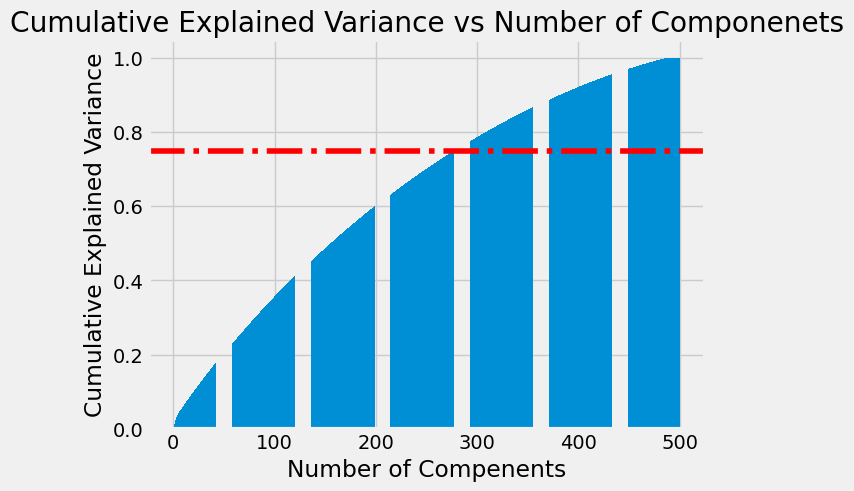

Number of Componenets needed to capture 75% variance is 277


In [ ]:
variance_vector = pca.explained_variance_ratio_
cum_var_vector = np.cumsum(variance_vector)


###Plotting the cumulative variance plot
plt.bar(range(1,501), cum_var_vector)
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Number of Compenents")
plt.title("Cumulative Explained Variance vs Number of Componenets")
plt.axhline(y=0.75, color='r', linestyle='dashdot')
plt.show()

n_comp = range(1,501)[np.argmin(np.abs(cum_var_vector - 0.75))]
print(f"Number of Componenets needed to capture 75% variance is {n_comp}")

#### As you can see, we need at least 277 compononts to capture 75% of the variance.

### 2.1 Perform PCA with your selected principal components.

In [ ]:
pca1 = PCA(n_components=n_comp)
madelon_pca1 = pca1.fit_transform(scaled_madelon)
madelon_pca1 = pd.DataFrame(data=madelon_pca1, columns=[f"pc_{i+1}" for i in range(madelon_pca1.shape[1])] )
madelon_pca1.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_268,pc_269,pc_270,pc_271,pc_272,pc_273,pc_274,pc_275,pc_276,pc_277
0,-4.962302,-0.581478,-2.462665,-1.829186,0.014363,1.404599,0.316580,-1.727196,-1.287822,0.109490,...,-0.683296,-0.453047,-0.890319,-0.171308,-0.105763,-0.121398,-1.734824,-0.359634,0.077754,0.032025
1,-0.461051,2.866736,0.039579,-1.380462,1.921507,-0.596321,-0.271448,-1.313991,-2.037568,1.138806,...,-0.311794,0.224627,0.168112,0.432780,-0.412047,-0.185483,-0.285840,-0.196286,-0.079058,0.280350
2,1.127560,-2.238922,0.047394,0.480159,-1.958455,-0.544642,0.058152,1.118080,-0.290898,0.474509,...,1.158742,1.951342,-0.455631,-0.639783,-1.349261,-1.639744,-0.215974,-0.484237,-0.247320,-0.847685
3,2.892043,-1.862178,1.578061,-0.652583,1.247097,0.023698,-0.855324,-0.378574,1.244902,1.470335,...,-0.767139,0.533643,-0.254164,-0.914327,-0.637915,2.580034,0.324683,0.953548,0.692032,0.929689
4,-0.667088,1.915247,1.666796,-2.263729,-1.791596,1.135403,1.097348,1.469596,0.864720,-1.461161,...,-1.453960,-0.252607,0.451078,0.349539,0.959743,0.057865,1.396098,-0.045973,0.904727,1.521626


### Plotting the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.

Text(0, 0.5, 'PC2')

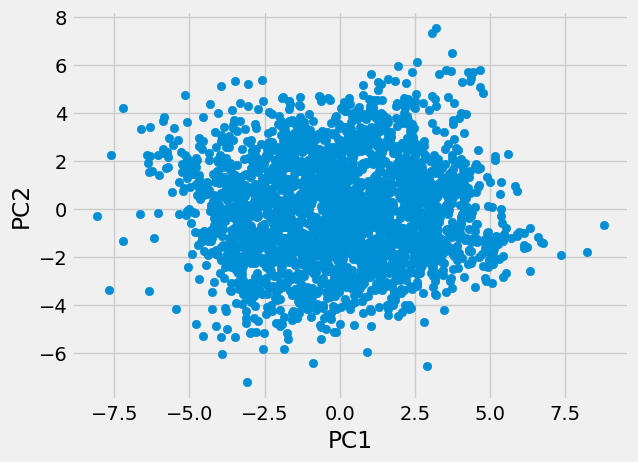

In [ ]:
plt.scatter(madelon_pca1[madelon_pca1.columns[0]],madelon_pca1[madelon_pca1.columns[1]])
plt.xlabel('PC1')
plt.ylabel('PC2')

### Plotting the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.

In [ ]:
loadings = pd.DataFrame(pca1.components_.T[:,0:2], columns=["pc_1","pc_2"], index=madelon_df.columns)
loadings

,pc_1,pc_2
V1,0.000281,0.001073
V2,-0.021318,-0.008901
V3,-0.003637,0.001354
V4,-0.000345,0.004594
V5,0.004225,-0.002034
...,...,...
V496,0.007318,-0.005035
V497,-0.008544,0.026469
V498,-0.008045,0.020251
V499,-0.007595,-0.012543


In [ ]:
loadings["sum"] = abs(loadings["pc_1"]) + abs(loadings["pc_2"])
loadings.sort_values(by='sum', ascending=False,inplace = True)
max_loading = loadings.index[0:2].tolist()
print(f"Two original variables that have the highest absolute combined loading for PC 1 and PC 2 are: {max_loading}")

Two original variables that have the highest absolute combined loading for PC 1 and PC 2 are: ['V339', 'V282']


Text(0, 0.5, 'V282')

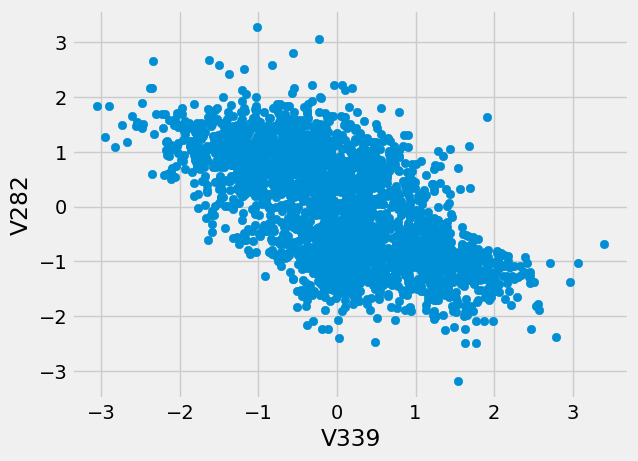

In [ ]:
scaled_madelon = pd.DataFrame(data=scaled_madelon, columns=madelon_df.columns)
scaled_madelon

plt.scatter(scaled_madelon['V339'], scaled_madelon['V282'])
plt.xlabel('V339')
plt.ylabel('V282')

#### Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?

Text(0, 0.5, 'PC2')

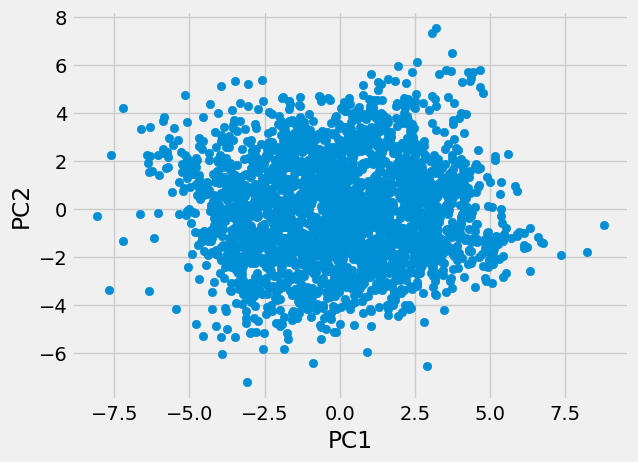

In [ ]:
# Plot from 2.2.1
plt.scatter(madelon_pca1[madelon_pca1.columns[0]],madelon_pca1[madelon_pca1.columns[1]])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
pca1.explained_variance_ratio_[0:2].sum()

0.022884271118255344

#### It is very hard to identify any clusters from the scatterplot since the dataset is very highdimensional and datapoints are very closely located to each other. Additionally PC1 and PC2 capture only about 2.5% of the total variation in the dataset. Thus, forming clusters based on this scatterplot may not be applicaple to the entire dataset.


 ## Now, we will run k-means clustering on the transformed data from the previous problem.

#### Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.
#### First and most importantly, applying PCA before k means clustering reduces the dimensionality of the dataset, by which directly decreasing the computational costs. It also captures the most important features from the data and get rids noise and irrelevant features. Decreasing dimensions of the dataset also makes it easy for us to visualize it. Last but not the least, performing PCA before k-means-clustering sometimes helps us to visually identify some of the natural clusters on the dataset based on variance, and can help us to get better performance from k-means-clustering algorithm. This might not always be the case, as it highly depends on the distribution of original dataset

### We will use the same k values again (4, 8, 16, 32, 64) to  generate an elbow plot.



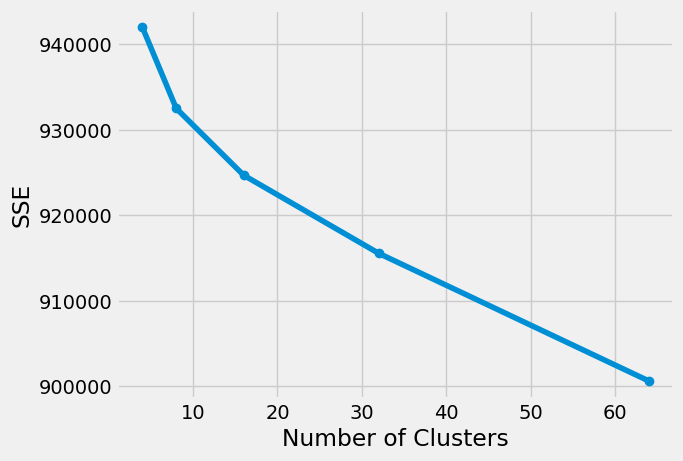

In [ ]:
### k means clustering on the 277 pcincipal componenets that capture 75% of the overall variation.
kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
k_list =[4,8,16,32,64]
sse = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(madelon_pca1)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(k_list, sse, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

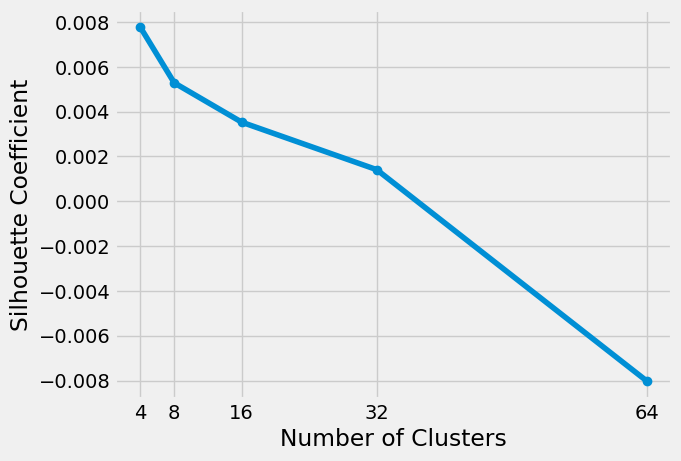

In [ ]:
### k means clustering on the 277 pcincipal componenets that capture 75% of the overall variation.
kmeans_args = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

k_list =[4,8,16,32,64]
silhouette_coefficients = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(madelon_pca1)
    score = silhouette_score(madelon_pca1, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(k_list, silhouette_coefficients, marker = "o")
plt.xticks(k_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### Similar to the k-means clustering we did on the original dataset, sse values decrease as the k increases. However, they are significantly less than what we got earlier. Although we are using only 277 principal components that capture 75% of the total variation, we still get improved SSE values for k-means clustering. Sihouette Coefficients is still the highest for k=4, and due to that we will chose optimal k to be 4 again.

##Again, We will create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points. Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?

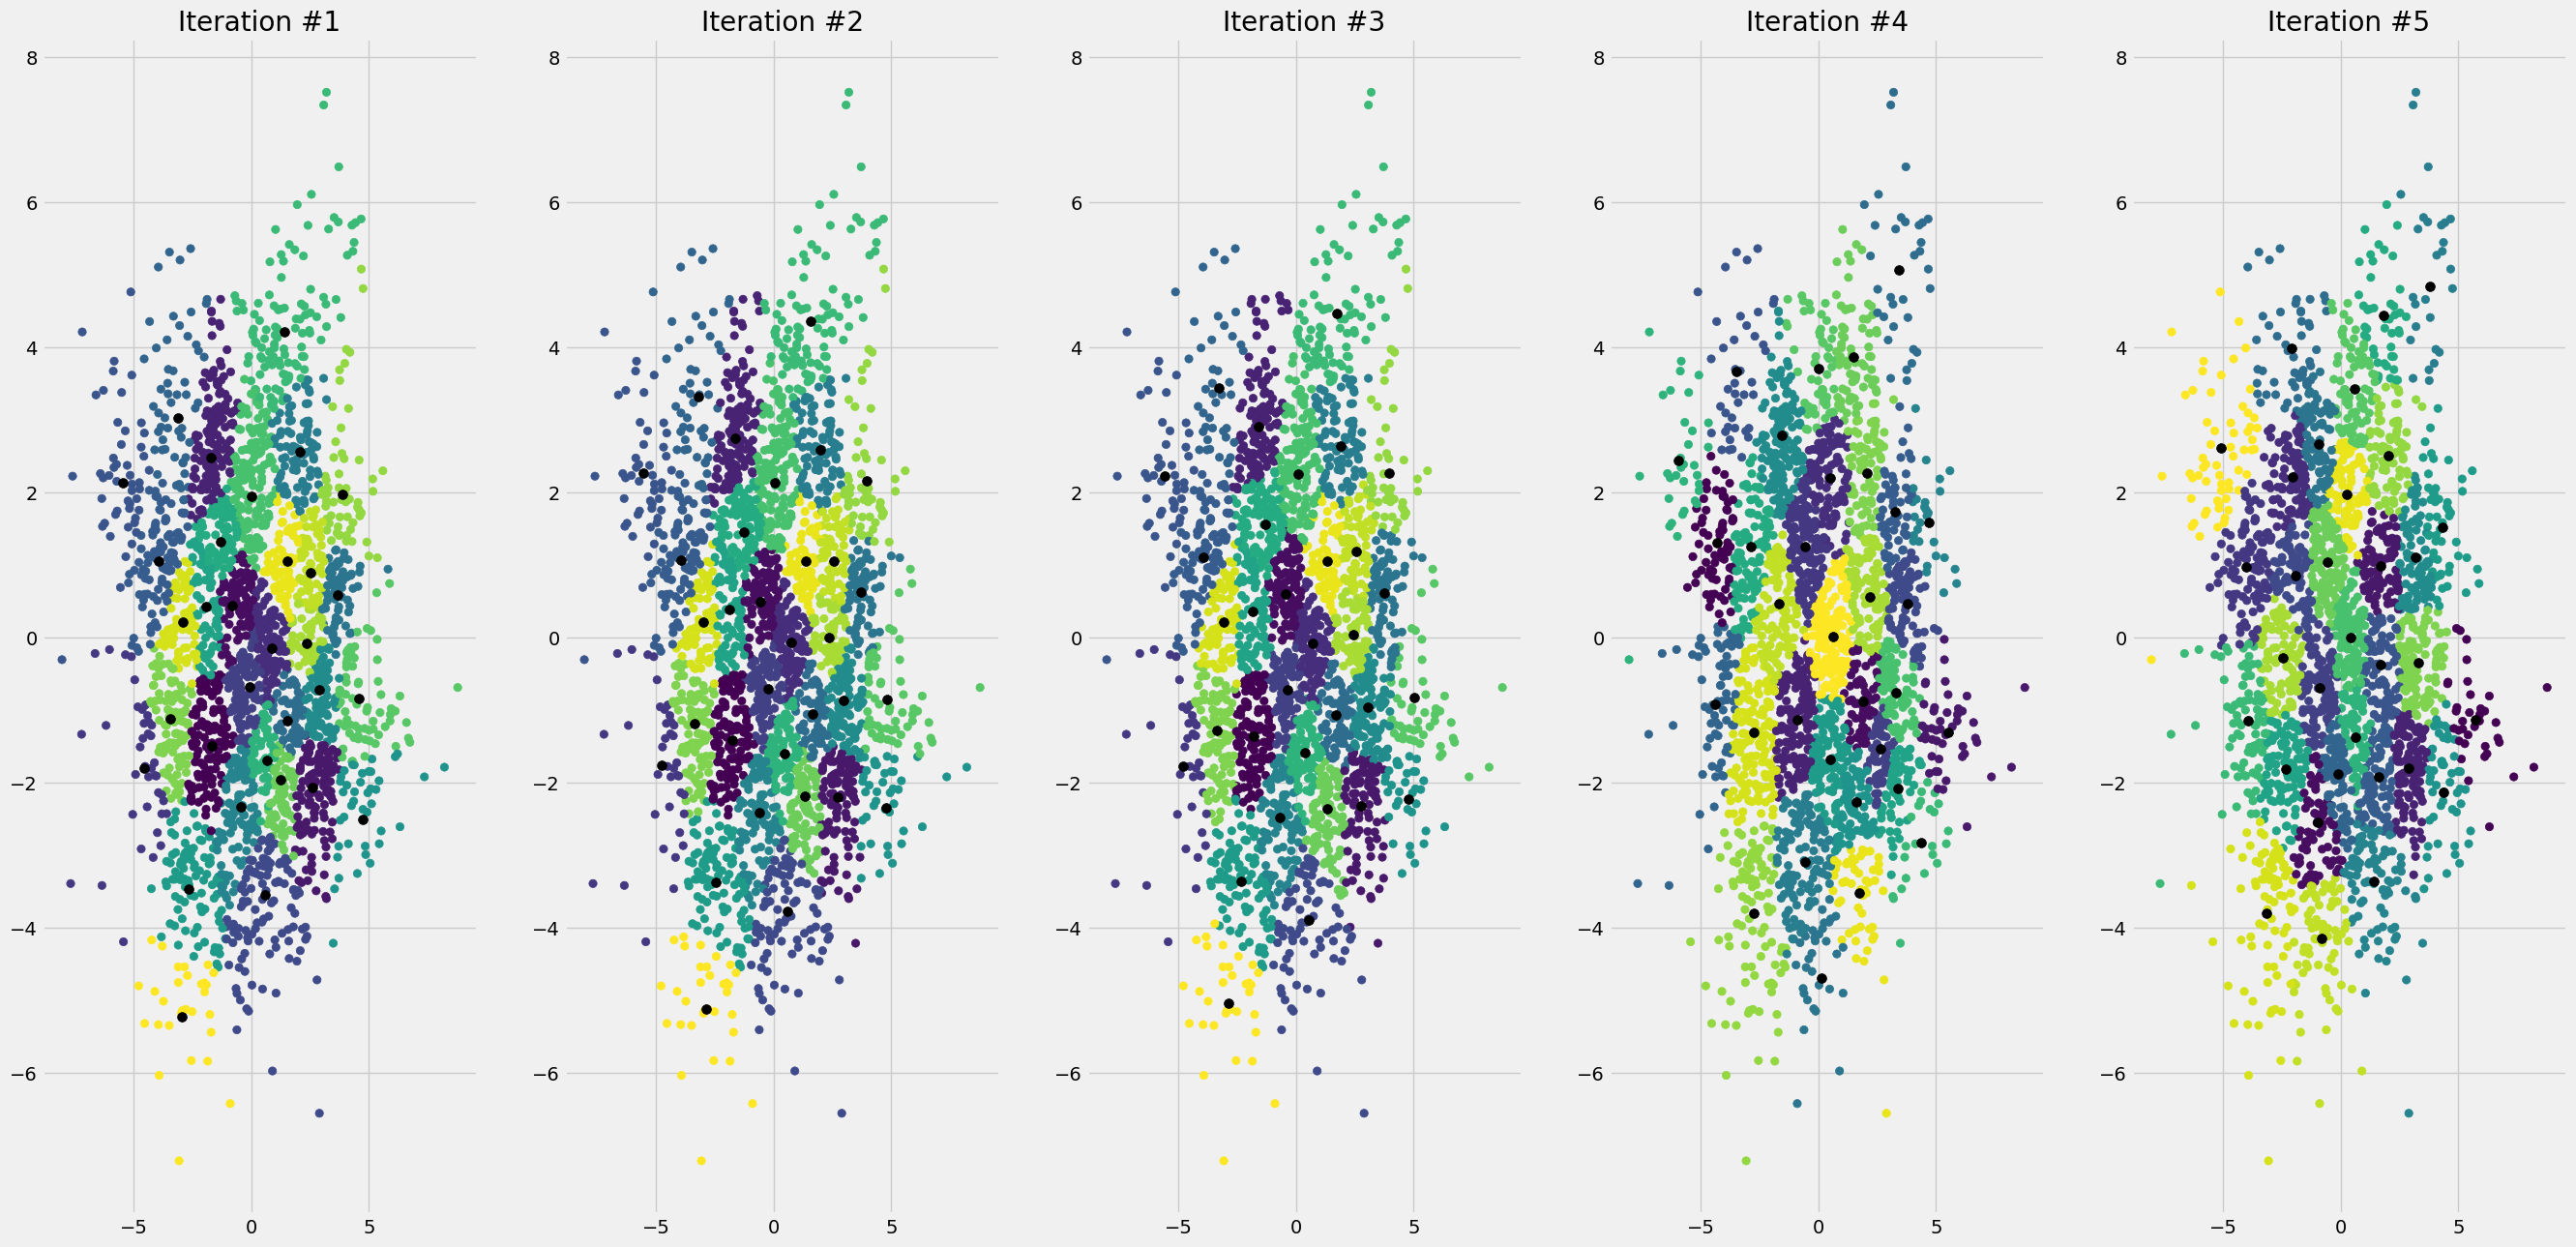

In [ ]:
fig, p = plt.subplots(nrows=1, ncols=5, figsize=(30,15))
for i in range(5):
    p[i].title.set_text(f"Iteration #{i+1}")
    kmeans_args = {
    "init": "random",
    "n_init": i+1,
    "max_iter": i+1,
    "random_state": 42,
    }
    kmeans = KMeans(n_clusters=32, **kmeans_args)
    kmeans.fit(madelon_pca1[madelon_pca1.columns[0:2]])
    centroids=kmeans.cluster_centers_
    p[i].scatter(madelon_pca1[madelon_pca1.columns[0]],madelon_pca1[madelon_pca1.columns[1]],c = kmeans.labels_.astype(float))
    p[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black')


#### We can clearly see from the plots that as the number of iterations increase, the centroid points and cluster structures change too, slowly converging to their optimal assignments.